In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
from train_selection_MAE import Edge, Node, Graph
import seaborn as sns
import os
import imageio

### initialization

In [2]:
if not os.path.exists("spleen_output"):
    os.makedirs("spleen_output")
# uncomment the line below to run but there are existing files for demo
# !python ../train_net/corr.py --csv_path '../csv/train_path_SP29.csv' --num_biomarkers 29 --save_path 'large_intestine/mae_mtx_SP' --transform_signal normalize2  # get initial edge weights
scores = np.load("spleen_output/mae_mtx_SP.npy")

In [3]:
num_biomarkers = 29

nodes = []
for i in range(num_biomarkers):
    nodes.append(Node(i, num_biomarkers))

edges = []
for i in range(num_biomarkers):
    for j in range(i+1,num_biomarkers):
        edge = Edge(scores[i,j])
        edge.nodes = (i,j)
        #edge.value = scores[i,j]
        edges.append(edge)
        nodes[i].edges.append(edge)
        nodes[j].edges.append(edge)

g = Graph(nodes,edges, num_biomarkers)

# chose the 1st input
node_degrees = []
for n in g.nodes:
    degree = sum(e.value for e in n.edges)
    minDegree = min(e.value for e in n.edges)
    n.init_degree = minDegree
    node_degrees.append(degree)
x = np.argmin(node_degrees)
# print(np.min(node_degrees))

g.input_.append(x)
idx = int(g.input_[-1])

print("add marker",idx, "into input")
print("input:", g.input_)

for i in g.output:
    if i == idx:
        g.output.remove(i)
print("output: ", g.output)

out = g.output.copy()

add marker 15 into input
input: [15]
output:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]


### Round1

In [4]:
# train the network with currect input and output markers 
# !python ../train_net/train_model.py --transform_signal normalize2 --n_iter 4000  --interval_save 200 --iter_checkpoint 200  --path_run_dir 'test_models_SP_01'  --path_dataset_csv "../csv/train_path_SP.csv"  --path_dataset_val_csv "../csv/val_path_SP.csv"  --input_index 15  --target_index 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25 26 27 28   --in_dim 1 --out_dim 28
# !python ../train_net/validation.py --transform_signal normalize2 --n_iter 4000 --path_run_dir 'test_models_SP_01'  --path_output_dir 'spleen_output/val_vae_01.npy' --path_dataset_val_csv "../csv/val_path_SP.csv"   --input_index  15  --target_index 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25 26 27 28 --in_dim 1 --out_dim 28

In [5]:
val_loss_path = r'spleen_output/val_vae_01.npy'
idx = g.updateAndFindNext(idx, val_loss_path)
out_drop = out.index(idx) # index of added input in the previous target list
print("--out_drop_index:", out_drop)
out = g.output.copy()

add 19 into input
input: [15, 19]
output:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28]
--out_drop_index: 18


### Round2

In [6]:
# !python ../train_net/train_model.py --transform_signal normalize2 --n_iter 4000  --interval_save 200 --iter_checkpoint 200  --path_run_dir 'test_models_SP_02'  --path_pretrain_dir 'test_models_SP_01' --path_dataset_csv "../csv/train_path_SP.csv"  --path_dataset_val_csv "../csv/val_path_SP.csv" --out_drop_index 18 --input_index 15 19 --target_index  1 2 3 4 5 6 7 8 9 10 11 12 13 14 16 17 18 20 21 22 23 24 25 26 27 28  --in_dim 2 --out_dim 27
# !python ../train_net/validation.py --transform_signal normalize2 --n_iter 4000 --path_run_dir 'test_models_SP_02'  --path_output_dir 'spleen_output/val_vae_02.npy' --path_dataset_val_csv "../csv/val_path_SP.csv"   --input_index  15 19  --target_index  1 2 3 4 5 6 7 8 9 10 11 12 13 14 16 17 18 20 21 22 23 24 25 26 27 28 --in_dim 2 --out_dim 27

In [7]:
val_loss_path = r'spleen_output/val_vae_02.npy'
idx = g.updateAndFindNext(idx, val_loss_path)
out_drop = out.index(idx) # index of added input in the previous target list
print("--out_drop_index:", out_drop)
out = g.output.copy()

add 27 into input
input: [15, 19, 27]
output:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 28]
--out_drop_index: 25


### Round3

In [8]:
# !python ../train_net/train_model.py --transform_signal normalize2 --n_iter 4000  --interval_save 200 --iter_checkpoint 200  --path_run_dir 'test_models_SP_03'  --path_pretrain_dir 'test_models_SP_02' --path_dataset_csv "../csv/train_path_SP.csv"  --path_dataset_val_csv "../csv/val_path_SP.csv" --out_drop_index 25 --input_index 15 19 25 --target_index  1 2 3 4 5 6 7 8 9 10 11 12 13 14 16 17 18 20 21 22 23 24 26 27 28  --in_dim 3 --out_dim 26
# !python ../train_net/validation.py --transform_signal normalize2 --n_iter 4000 --path_run_dir 'test_models_SP_03'  --path_output_dir 'spleen_output/val_vae_03.npy' --path_dataset_val_csv "../csv/val_path_SP.csv"   --input_index  15 19 27 --target_index  1 2 3 4 5 6 7 8 9 10 11 12 13 14 16 17 18 20 21 22 23 24 25 26 28 --in_dim 3 --out_dim 26

In [9]:
val_loss_path = r'spleen_output/val_vae_03.npy'
idx = g.updateAndFindNext(idx, val_loss_path)
out_drop = out.index(idx) # index of added input in the previous target list
print("--out_drop_index:", out_drop)
out = g.output.copy()

add 7 into input
input: [15, 19, 27, 7]
output:  [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 28]
--out_drop_index: 7


### Round4

In [10]:
# !python ../train_net/train_model.py --transform_signal normalize2 --n_iter 4000  --interval_save 200 --iter_checkpoint 200  --path_run_dir 'test_models_SP_04'  --path_pretrain_dir 'test_models_SP_03' --path_dataset_csv "../csv/train_path_SP.csv"  --path_dataset_val_csv "../csv/val_path_SP.csv" --out_drop_index 7 --input_index 15 19 25 7 --target_index  1 2 3 4 5 6 8 9 10 11 12 13 14 16 17 18 20 21 22 23 24 26 27 28  --in_dim 4 --out_dim 25
# !python ../train_net/validation.py --transform_signal normalize2 --n_iter 4000 --path_run_dir 'test_models_SP_04'  --path_output_dir 'spleen_output/val_vae_04.npy' --path_dataset_val_csv "../csv/val_path_SP.csv"   --input_index  15 19 27 7 --target_index  1 2 3 4 5 6 8 9 10 11 12 13 14 16 17 18 20 21 22 23 24 25 26 28 --in_dim 4 --out_dim 25

In [11]:
val_loss_path = r'spleen_output/val_vae_04.npy'
idx = g.updateAndFindNext(idx, val_loss_path)
out_drop = out.index(idx) # index of added input in the previous target list
print("--out_drop_index:", out_drop)
out = g.output.copy()

add 2 into input
input: [15, 19, 27, 7, 2]
output:  [0, 1, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 28]
--out_drop_index: 2


### Round5

In [12]:
# !python ../train_net/train_model.py --transform_signal normalize2 --n_iter 4000  --interval_save 200 --iter_checkpoint 200  --path_run_dir 'test_models_SP_05'  --path_pretrain_dir 'test_models_SP_04' --path_dataset_csv "../csv/train_path_SP.csv"  --path_dataset_val_csv "../csv/val_path_SP.csv" --out_drop_index 2 --input_index 15 19 25 7 2 --target_index  1 3 4 5 6 8 9 10 11 12 13 14 16 17 18 20 21 22 23 24 26 27 28  --in_dim 5 --out_dim 24
# !python ../train_net/validation.py --transform_signal normalize2 --n_iter 4000 --path_run_dir 'test_models_SP_05'  --path_output_dir 'spleen_output/val_vae_05.npy' --path_dataset_val_csv "../csv/val_path_SP.csv"   --input_index  15 19 27 7 2 --target_index  1 3 4 5 6 8 9 10 11 12 13 14 16 17 18 20 21 22 23 24 25 26 28 --in_dim 5 --out_dim 24

In [13]:
val_loss_path = r'spleen_output/val_vae_05.npy'
idx = g.updateAndFindNext(idx, val_loss_path)
out_drop = out.index(idx) 
print("--out_drop_index:", out_drop)
out = g.output.copy()

add 28 into input
input: [15, 19, 27, 7, 2, 28]
output:  [0, 1, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26]
--out_drop_index: 23


### Round6

In [14]:
# !python ../train_net/train_model.py --transform_signal normalize2 --n_iter 4000  --interval_save 200 --iter_checkpoint 200  --path_run_dir 'test_models_SP_06'  --path_pretrain_dir 'test_models_SP_05' --path_dataset_csv "../csv/train_path_SP.csv"  --path_dataset_val_csv "../csv/val_path_SP.csv" --out_drop_index 23 --input_index 15 19 25 7 2 28 --target_index  1 3 4 5 6 8 9 10 11 12 13 14 16 17 18 20 21 22 23 24 26 27  --in_dim 6 --out_dim 23
# !python ../train_net/validation.py --transform_signal normalize2 --n_iter 4000 --path_run_dir 'test_models_SP_06'  --path_output_dir 'spleen_output/val_vae_06.npy' --path_dataset_val_csv "../csv/val_path_SP.csv"   --input_index  15 19 27 7 2 28 --target_index  1 3 4 5 6 8 9 10 11 12 13 14 16 17 18 20 21 22 23 24 25 26 --in_dim 6 --out_dim 23

In [15]:
val_loss_path = r'spleen_output/val_vae_06.npy'
idx = g.updateAndFindNext(idx, val_loss_path)
out_drop = out.index(idx) # index of added input in the previous target list
print("--out_drop_index:", out_drop)
out = g.output.copy()

add 5 into input
input: [15, 19, 27, 7, 2, 28, 5]
output:  [0, 1, 3, 4, 6, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26]
--out_drop_index: 4


### Round7

In [16]:
# !python ../train_net/train_model.py --transform_signal normalize2 --n_iter 4000  --interval_save 200 --iter_checkpoint 200  --path_run_dir 'test_models_SP_07'  --path_pretrain_dir 'test_models_SP_06' --path_dataset_csv "../csv/train_path_SP.csv"  --path_dataset_val_csv "../csv/val_path_SP.csv" --out_drop_index 4 --input_index 15 19 25 7 2 28 5 --target_index  1 3 4 6 8 9 10 11 12 13 14 16 17 18 20 21 22 23 24 26 27  --in_dim 7 --out_dim 22
# !python ../train_net/validation.py --transform_signal normalize2 --n_iter 4000 --path_run_dir 'test_models_SP_07'  --path_output_dir 'spleen_output/val_vae_07.npy' --path_dataset_val_csv "../csv/val_path_SP.csv"   --input_index  15 19 27 7 2 28 5 --target_index  1 3 4 6 8 9 10 11 12 13 14 16 17 18 20 21 22 23 24 25 26 --in_dim 7 --out_dim 22

In [17]:
val_loss_path = r'spleen_output/val_vae_07.npy'
idx = g.updateAndFindNext(idx, val_loss_path)
out_drop = out.index(idx) # index of added input in the previous target list
print("--out_drop_index:", out_drop)
out = g.output.copy()

add 8 into input
input: [15, 19, 27, 7, 2, 28, 5, 8]
output:  [0, 1, 3, 4, 6, 9, 10, 11, 12, 13, 14, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26]
--out_drop_index: 5


In [18]:
with open('marker_list/LN29.txt') as f:
    sp_markers = f.read().splitlines()

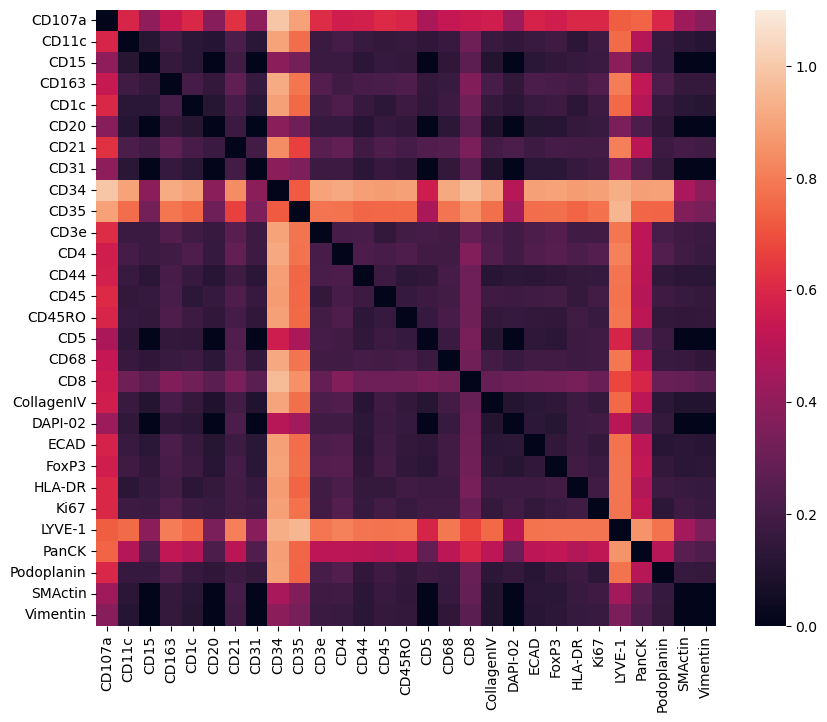

In [21]:
n = len(g.nodes)
edge_mtx = np.zeros((n, n))
for i in range(n):
    edges = g.nodes[i].edges
    for k in range(i, len(edges)):
        j = k+1
        edge_mtx[i,j] = edges[k].value
for j in range(n):
    edge_mtx[j, j] = 0
    for i in range(j+1, n):
        edge_mtx[i, j] = edge_mtx[j, i]

fig, ax = plt.subplots(figsize=(10, 8))
df = pd.DataFrame(edge_mtx)
# p = sns.heatmap(df, xticklabels=True, yticklabels=True)
p = sns.heatmap(df, xticklabels=True, yticklabels=True, vmin=0, vmax = 1.1)
p.set_xticklabels(sp_markers, rotation=90)
p.set_yticklabels(sp_markers, rotation=0)
plt.show()

### test

In [20]:
# !python predict_full_view.py --transform_signal normalize2 --save_image  --path_run_dir 'test_models_SP_7'  --path_dataset_csv "../csv/test_path_SP.csv" --input_index  15 19 27 7 2 28 5 --target_index  1 3 4 6 8 9 10 11 12 13 14 16 17 18 20 21 22 23 24 25 26